In [2]:
from tms_risk.cogmodels.fit_model import build_model, get_data
from tms_risk.cogmodels.utils import plot_prediction, stimulation_order, stimulation_palette, plot_ppc
import seaborn as sns
import arviz as az
import os.path as op
import pandas as pd
import matplotlib.pyplot as plt
from bauer.utils.math import softplus_np
import numpy as np
from bauer.models import FlexibleNoiseRiskRegressionModel
from tqdm import tqdm

bids_folder = '/data/ds-tmsrisk'

# Some convenience functions
def get_info(model_label, bids_folder='/data/ds-tmsrisk'):

    df = get_data(model_label=model_label, bids_folder=bids_folder)
    model = build_model(df=df, model_label=model_label)
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

    return df, model, idata

# 5-spline models

  0%|          | 0/6 [00:00<?, ?it/s]

Output()

 17%|█▋        | 1/6 [00:24<02:03, 24.78s/it]

Output()

 33%|███▎      | 2/6 [00:45<01:28, 22.11s/it]

Output()

 50%|█████     | 3/6 [01:08<01:08, 22.85s/it]

Output()

 67%|██████▋   | 4/6 [01:29<00:43, 21.91s/it]

Output()

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
 83%|████████▎ | 5/6 [01:51<00:22, 22.20s/it]

Output()

100%|██████████| 6/6 [02:22<00:00, 23.74s/it]


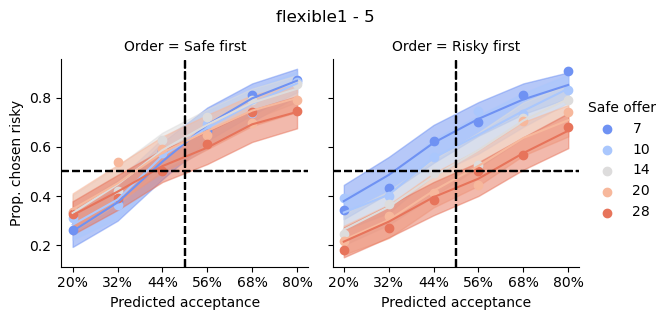

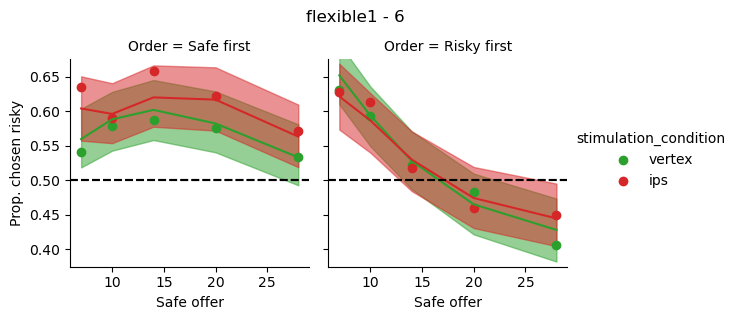

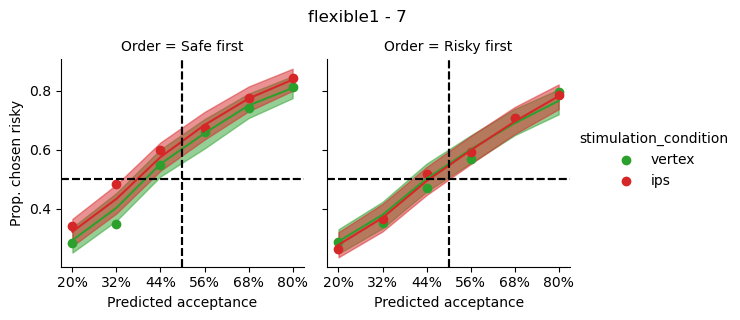

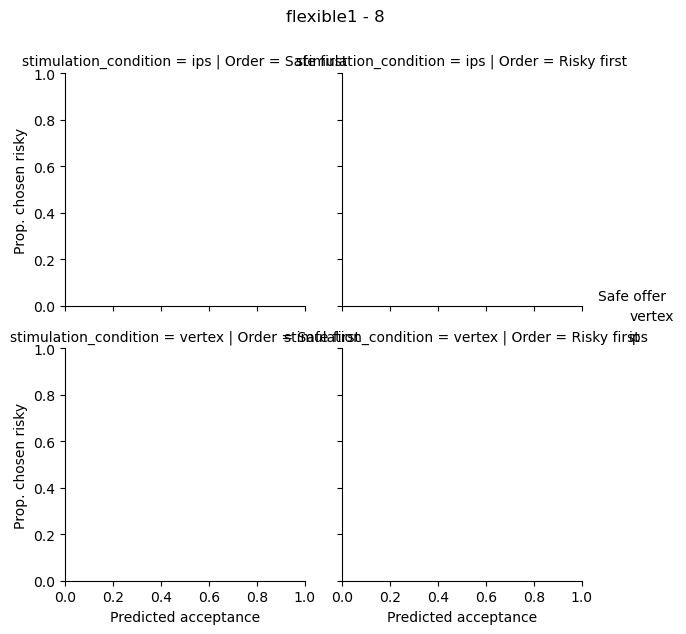

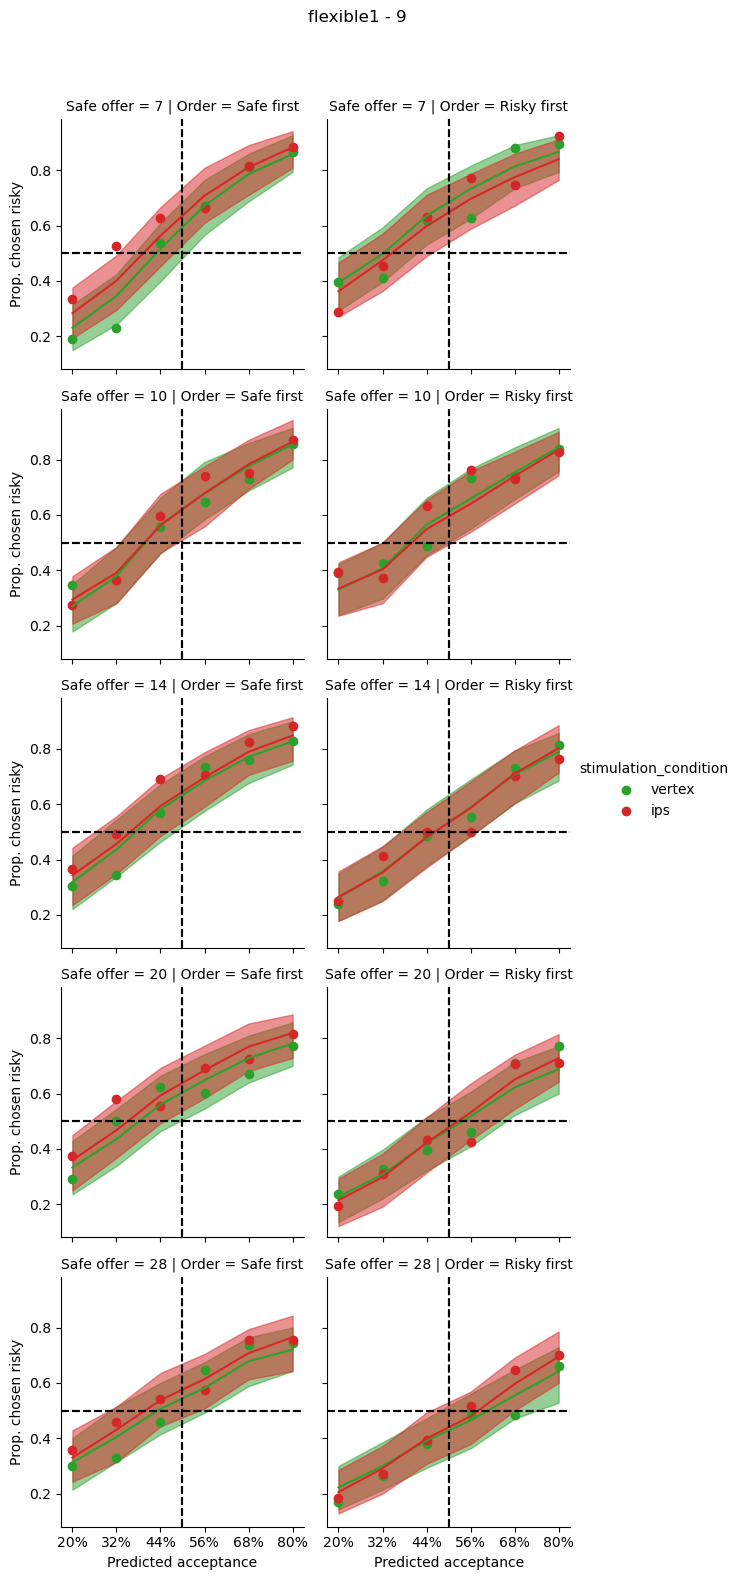

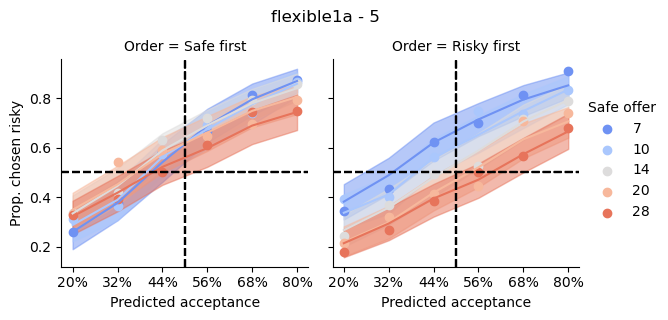

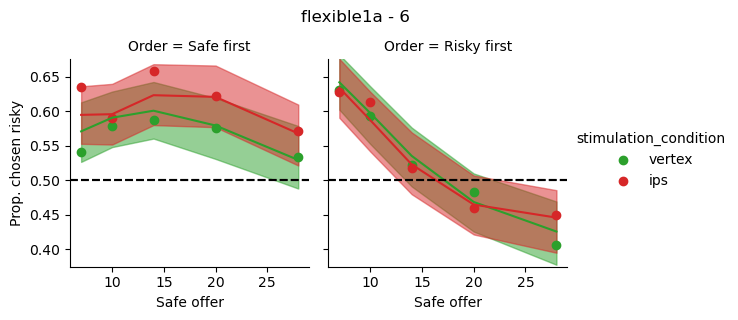

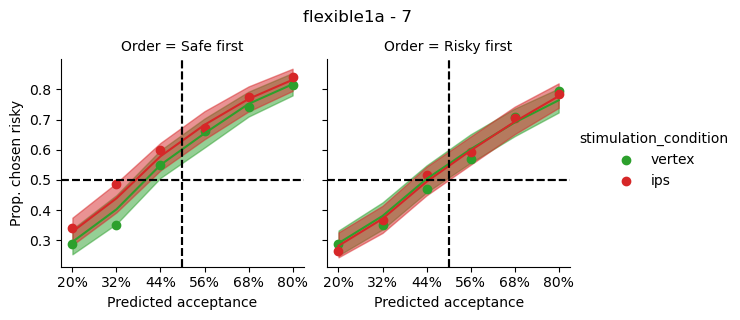

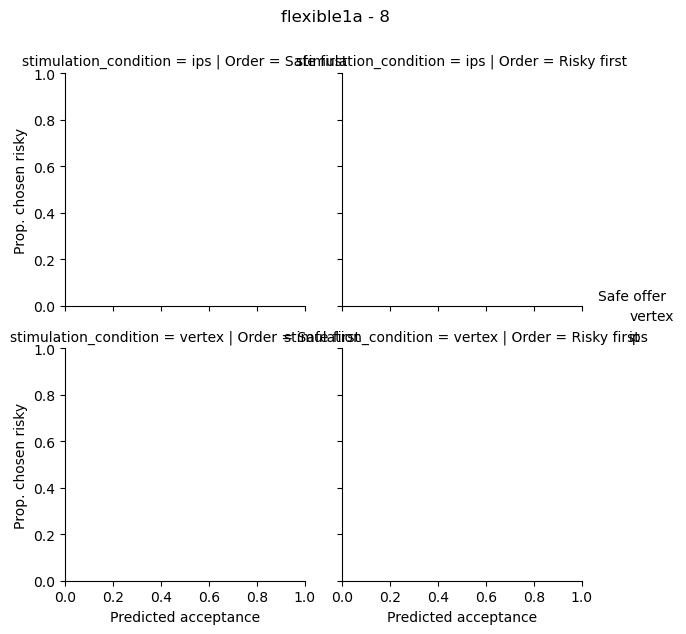

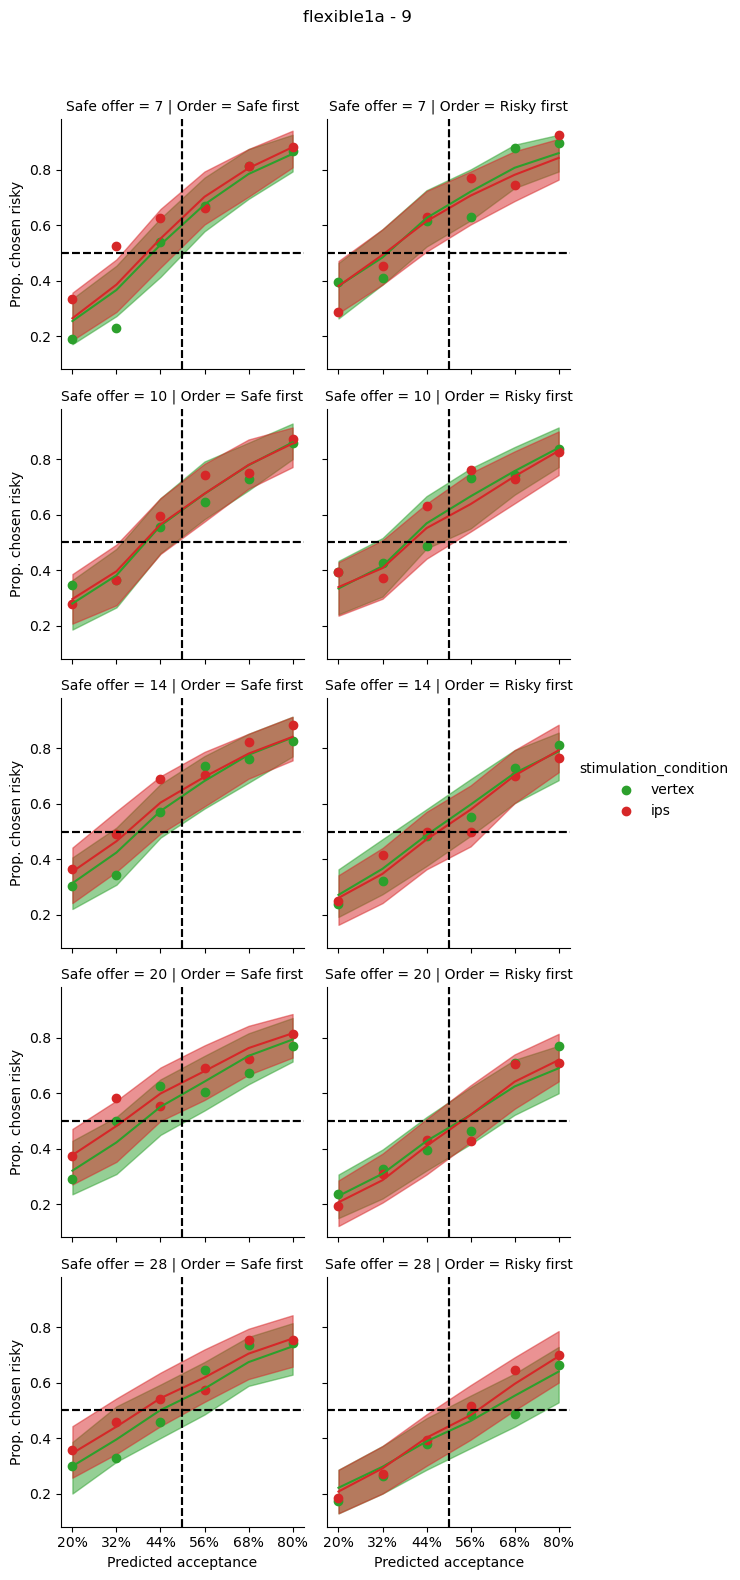

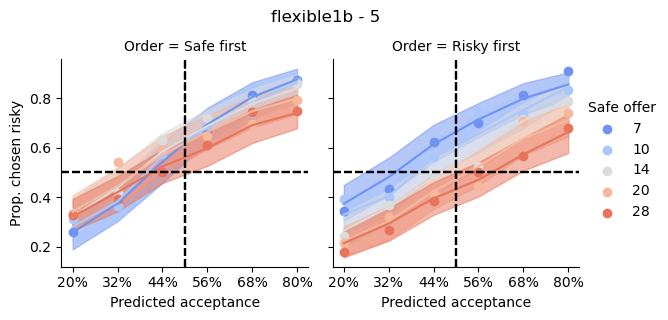

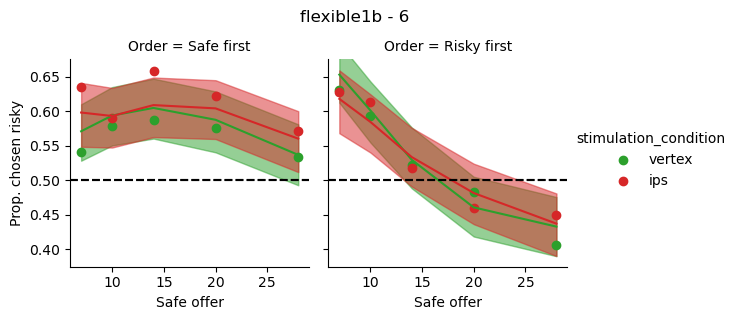

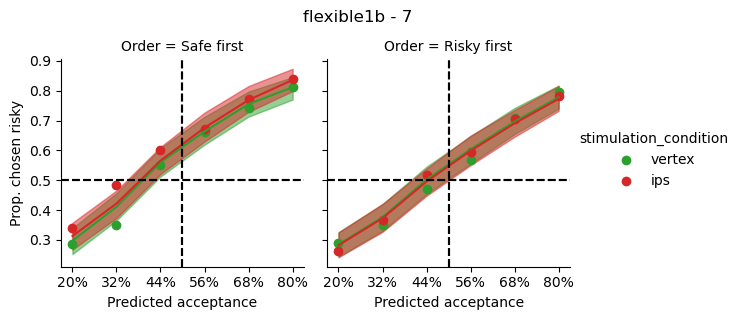

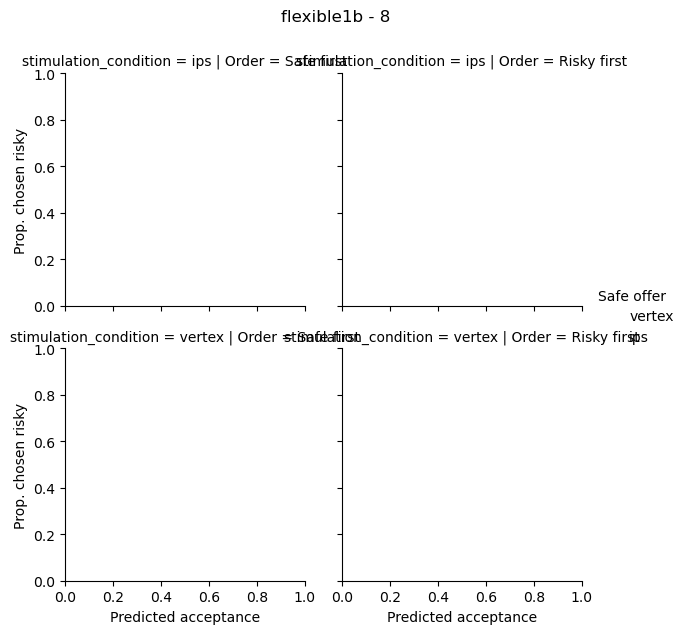

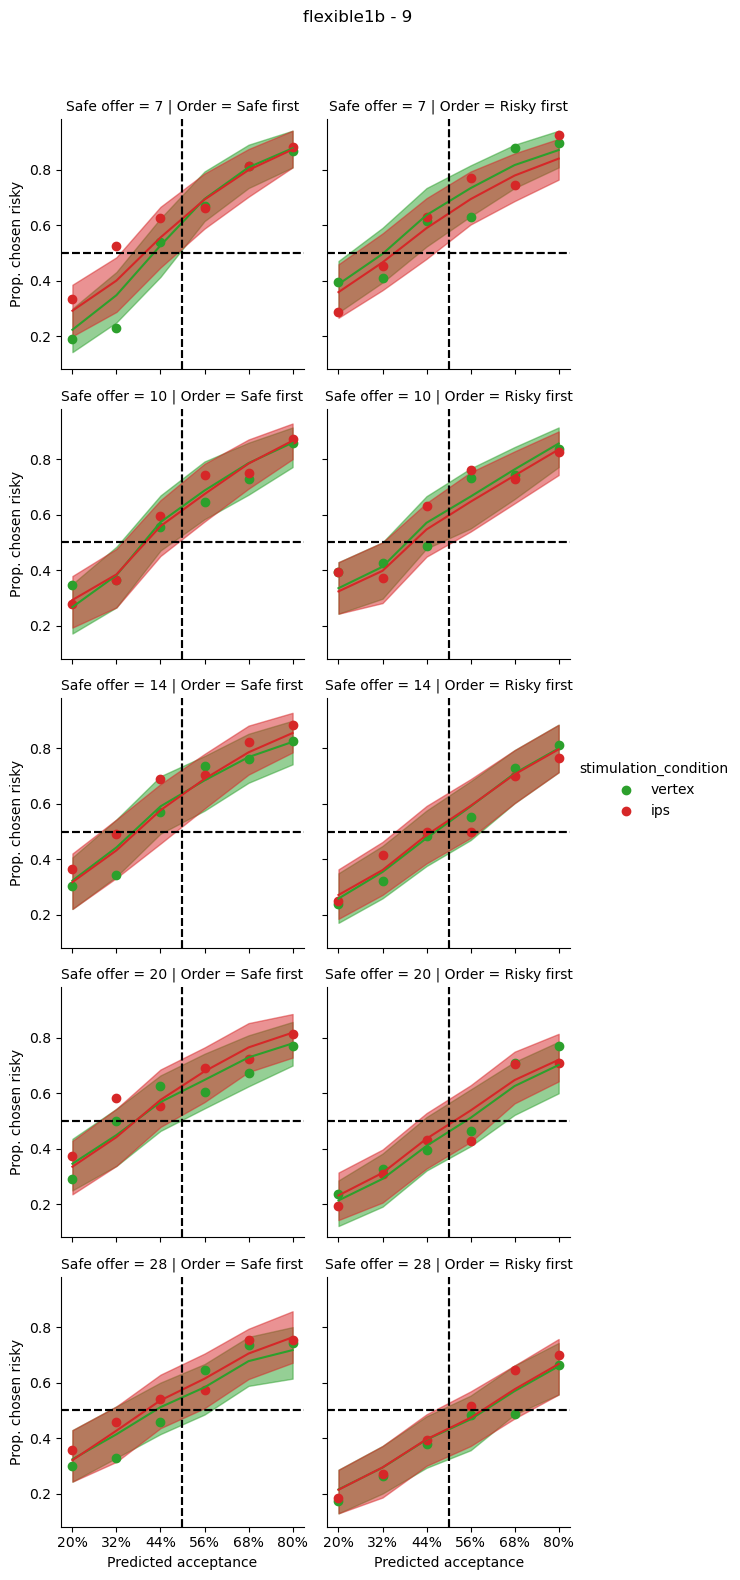

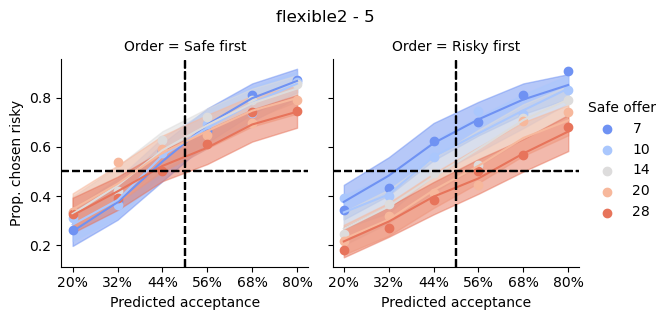

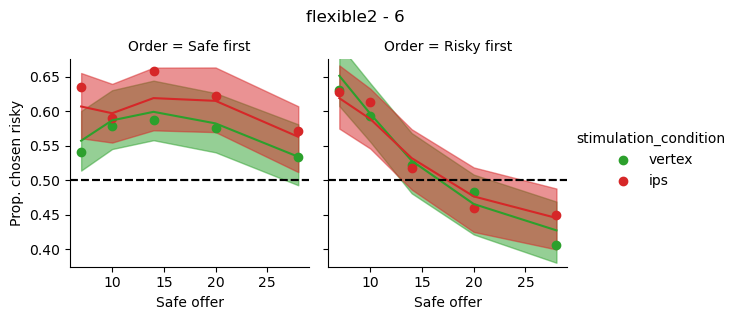

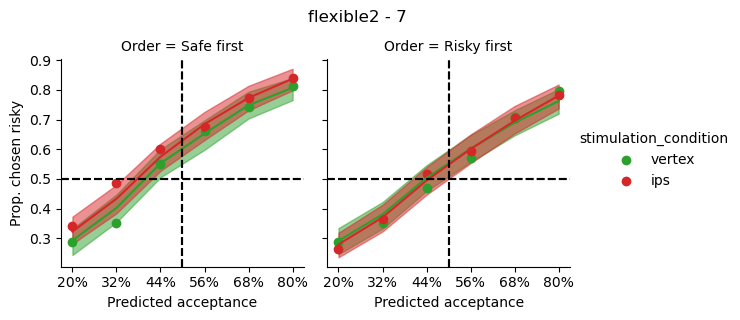

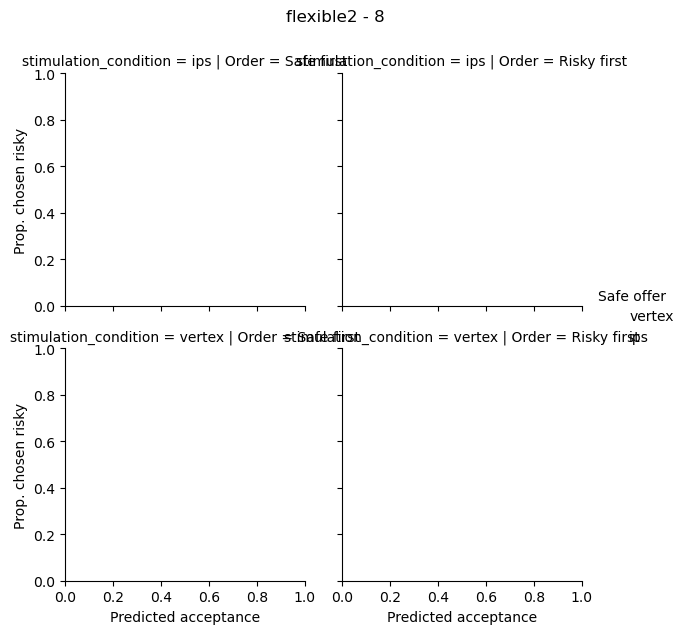

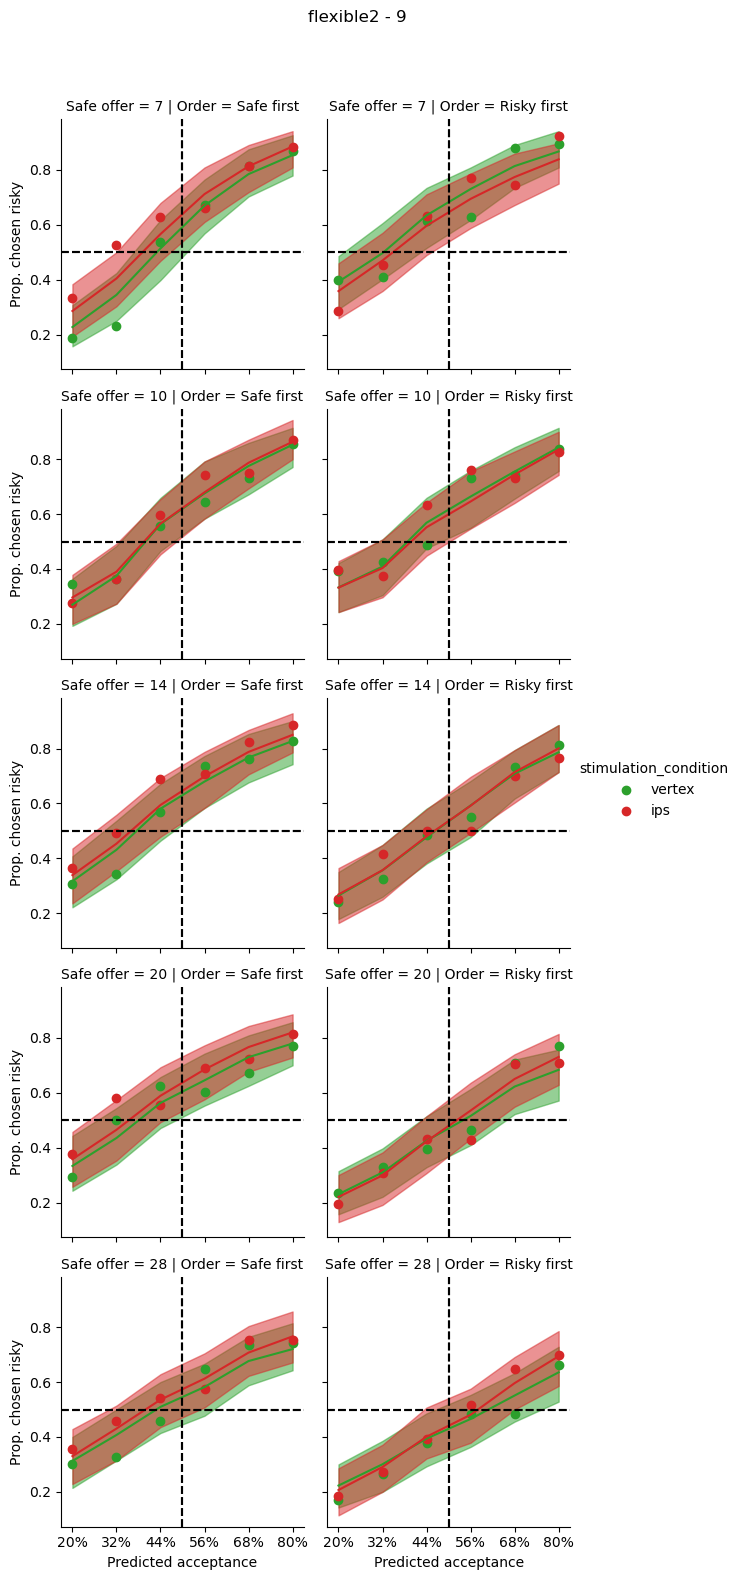

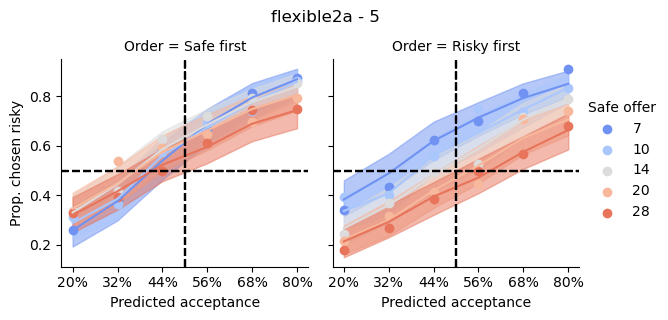

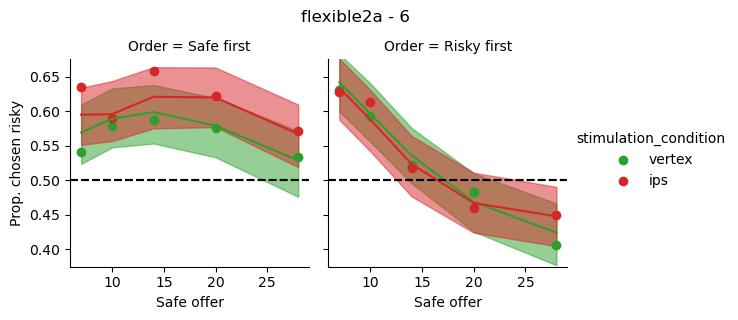

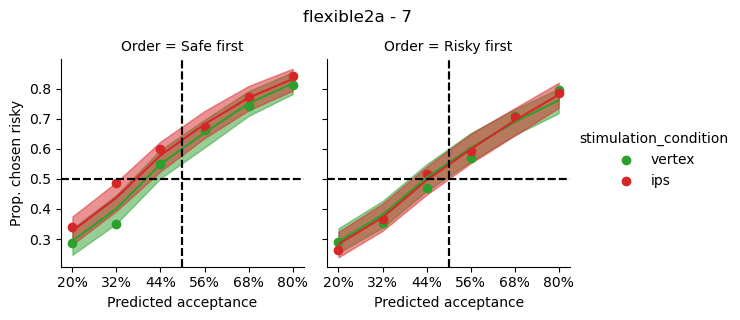

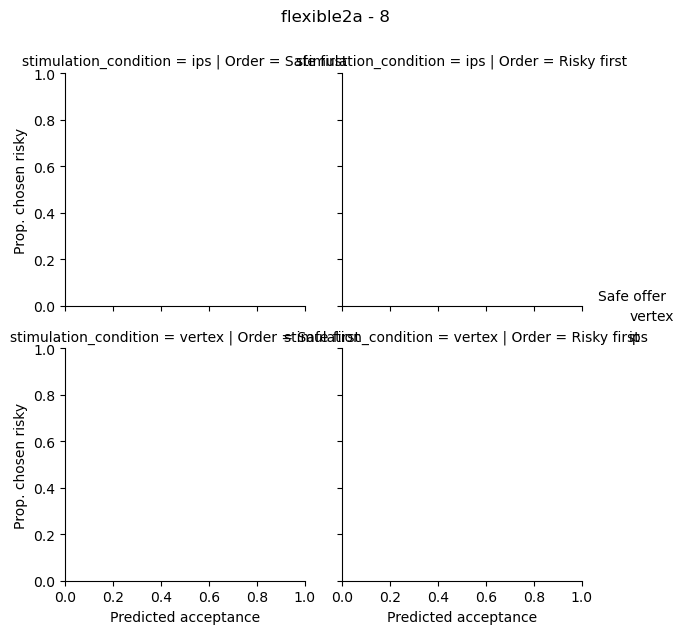

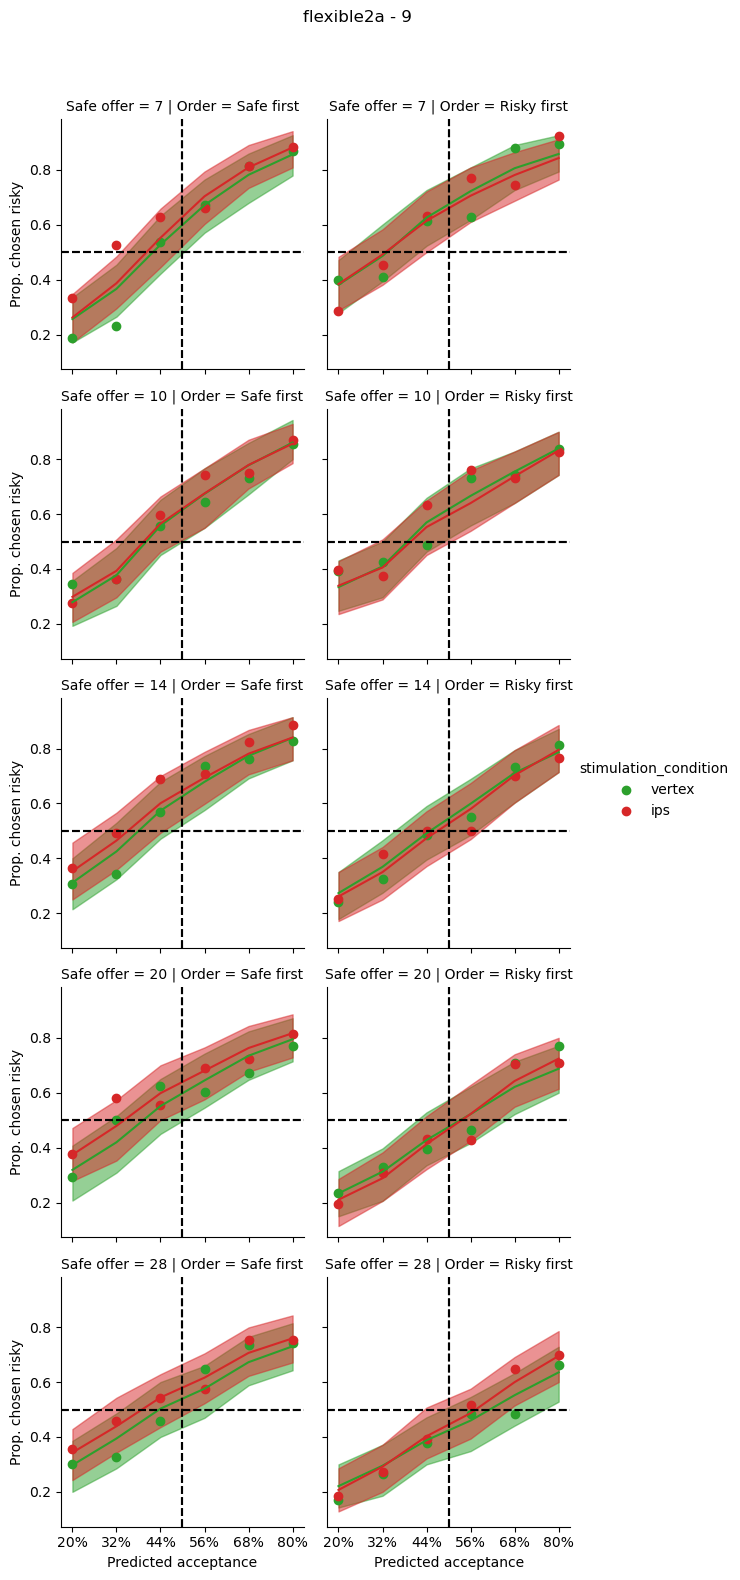

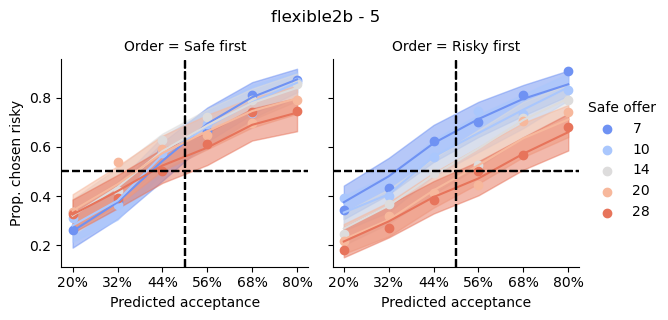

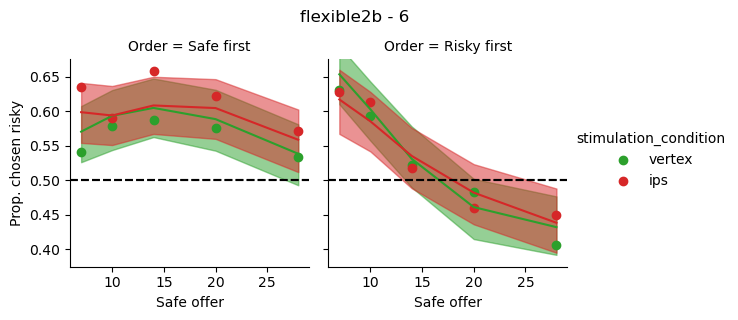

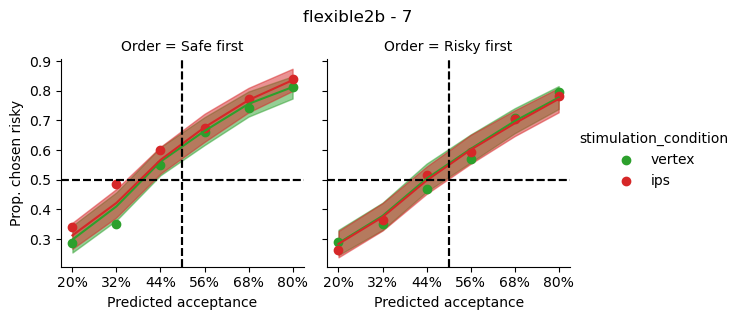

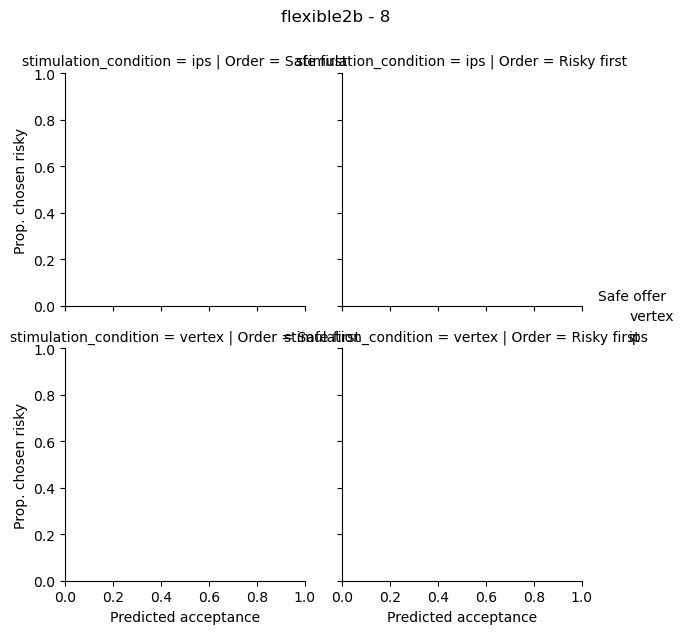

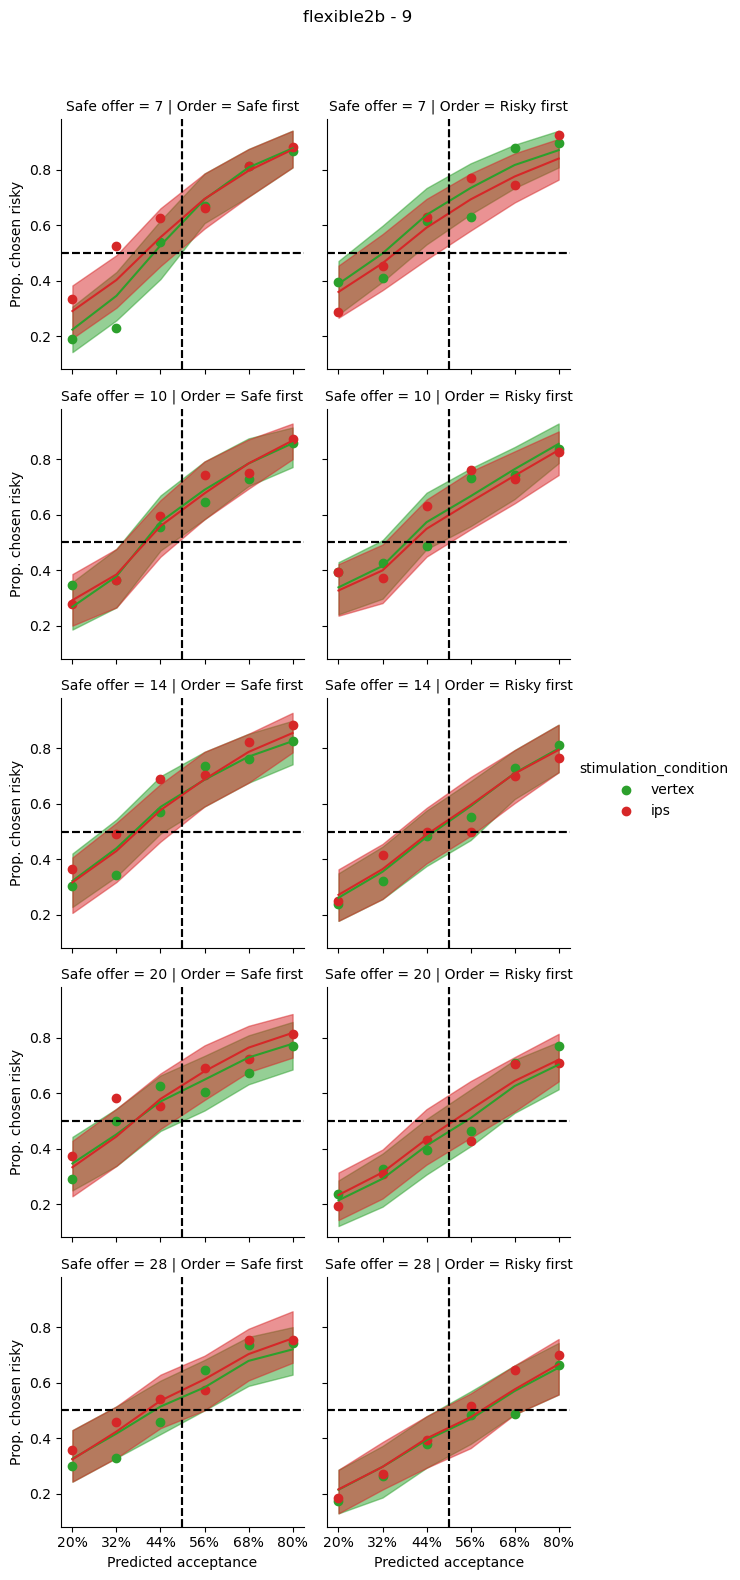

In [2]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

curve_stats = []
model_labels  = ['flexible1', 'flexible1a', 'flexible1b', 'flexible2', 'flexible2a', 'flexible2b']

curves = []
for model_label in tqdm(model_labels):
    df, model, idata = get_info(model_label)

    model.build_estimation_model()
    ppc =model.ppc(df, idata.sel(draw=slice(None, None, 10)))

    ix_risky_first = ppc.index.get_level_values('risky_first')
    ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first]

    for plot in [5,6,7, 8, 9]:
        g = plot_ppc(df, ppc, plot_type=plot, level='group') 
        g.fig.suptitle(f'{model_label} - {plot}', y=1.05)

        g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'cogmodels', f'{model_label}_plot{plot}.pdf'))


## PPCs

In [2]:
df, model, idata = get_info('flexible1')

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


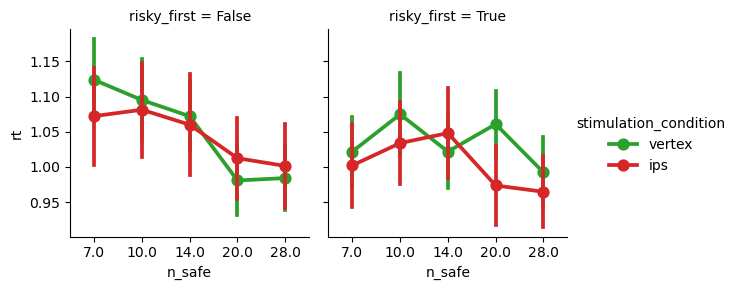

In [13]:
g = sns.FacetGrid(df.groupby(['subject', 'n_safe', 'risky_first', 'stimulation_condition'])[['rt']].mean().reset_index(), col='risky_first', hue='stimulation_condition',
                  hue_order=['vertex', 'ips'], palette=stimulation_palette)

g.map(sns.pointplot, 'n_safe', 'rt', errorbar='se')

g.add_legend()

In [17]:
choice.reset_index()

stimulation_condition  subject  n_safe  risky_first       ips    vertex
0                            1     7.0        False  0.750000  0.636364
1                            1     7.0         True  0.250000  0.333333
2                            1    10.0        False  0.750000  0.333333
3                            1    10.0         True  0.583333  0.500000
4                            1    14.0        False  0.583333  0.583333
..                         ...     ...          ...       ...       ...
345                         74    14.0         True  0.666667  0.833333
346                         74    20.0        False  0.083333  0.083333
347                         74    20.0         True  0.750000  0.666667
348                         74    28.0        False  0.166667  0.416667
349                         74    28.0         True  0.916667  0.666667

[350 rows x 5 columns]

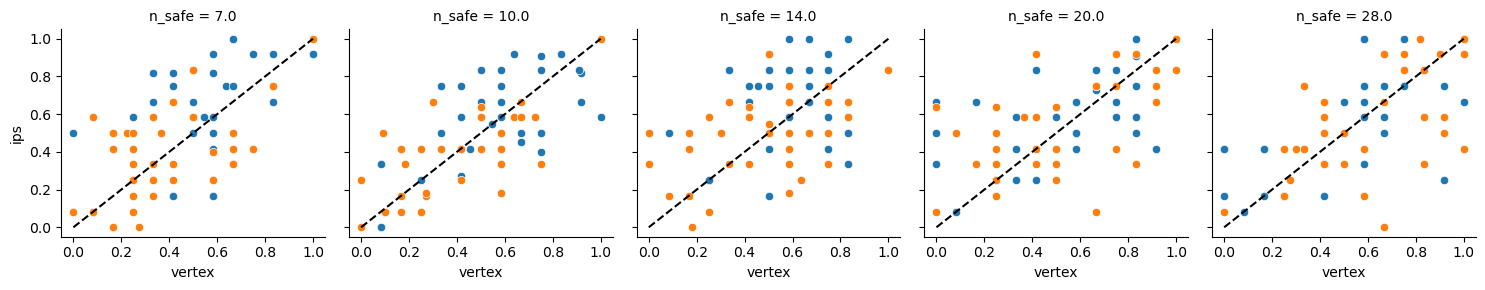

In [19]:
choice = df.groupby(['subject', 'n_safe', 'risky_first', 'stimulation_condition'])['choice'].mean().unstack('stimulation_condition')

g = sns.FacetGrid(choice.reset_index(), col='n_safe', hue='risky_first')

g.map(sns.scatterplot, 'vertex', 'ips')

# Identity line
for ax in g.axes.flat:
    ax.plot([0,1], [0,1], 'k--')

# 4-spline model

In [ ]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

curve_stats = []
model_labels  = ['flexible1.4', 'flexible1.4a', 'flexible1.4b', 'flexible2.4', 'flexible2.4a', 'flexible2.4b']

curves = []
for model_label in tqdm(model_labels):
    df, model, idata = get_info(model_label)

    model.build_estimation_model()
    ppc =model.ppc(df, idata.sel(draw=slice(None, None, 10)))

    ix_risky_first = ppc.index.get_level_values('risky_first')
    ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first]

    for plot in [5,6,7, 8, 9]:
        g = plot_ppc(df, ppc, plot_type=plot, level='group') 
        g.fig.suptitle(f'{model_label} - {plot}', y=1.05)

        g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'cogmodels', f'{model_label}_plot{plot}.pdf'))


# 6-spline model

  0%|          | 0/6 [00:00<?, ?it/s]

Output()

 17%|█▋        | 1/6 [00:26<02:10, 26.06s/it]

Output()

 33%|███▎      | 2/6 [00:47<01:32, 23.22s/it]

Output()

 50%|█████     | 3/6 [01:08<01:07, 22.46s/it]

Output()

 67%|██████▋   | 4/6 [01:31<00:44, 22.41s/it]

Output()

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
 83%|████████▎ | 5/6 [01:52<00:22, 22.04s/it]

Output()

100%|██████████| 6/6 [02:13<00:00, 22.23s/it]


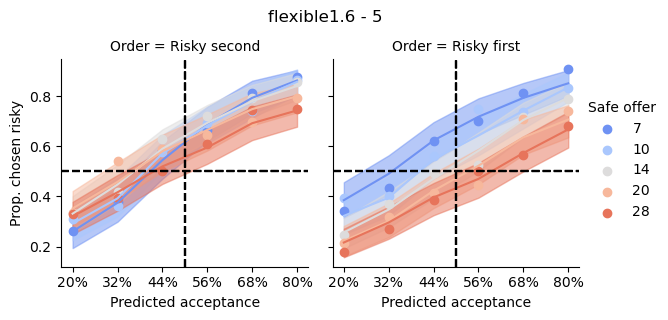

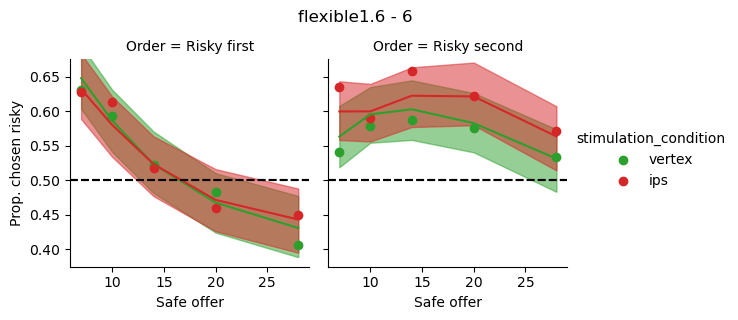

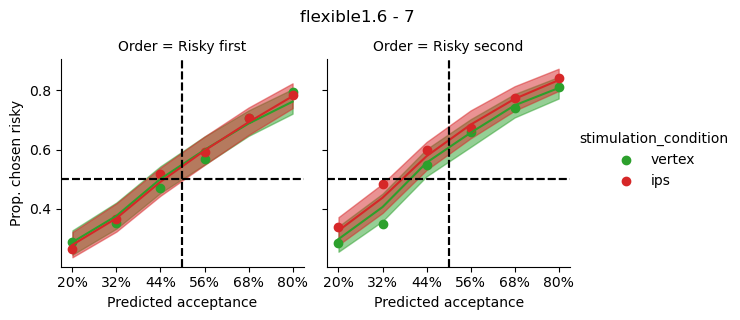

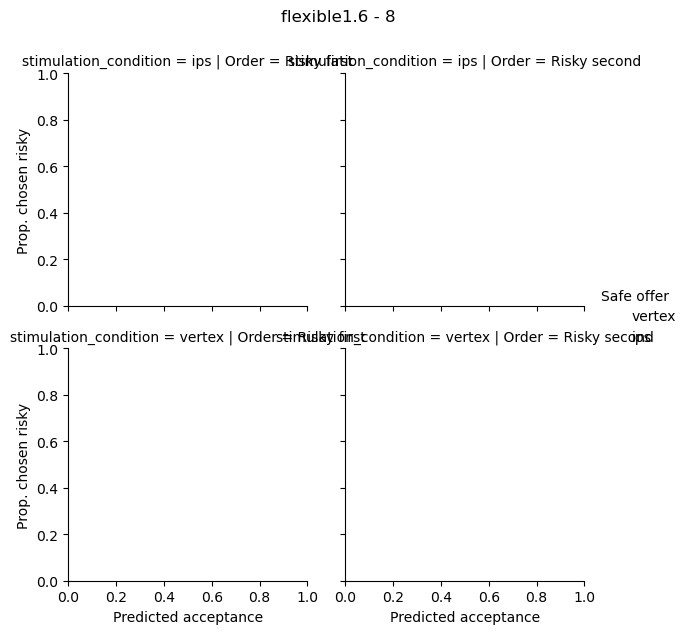

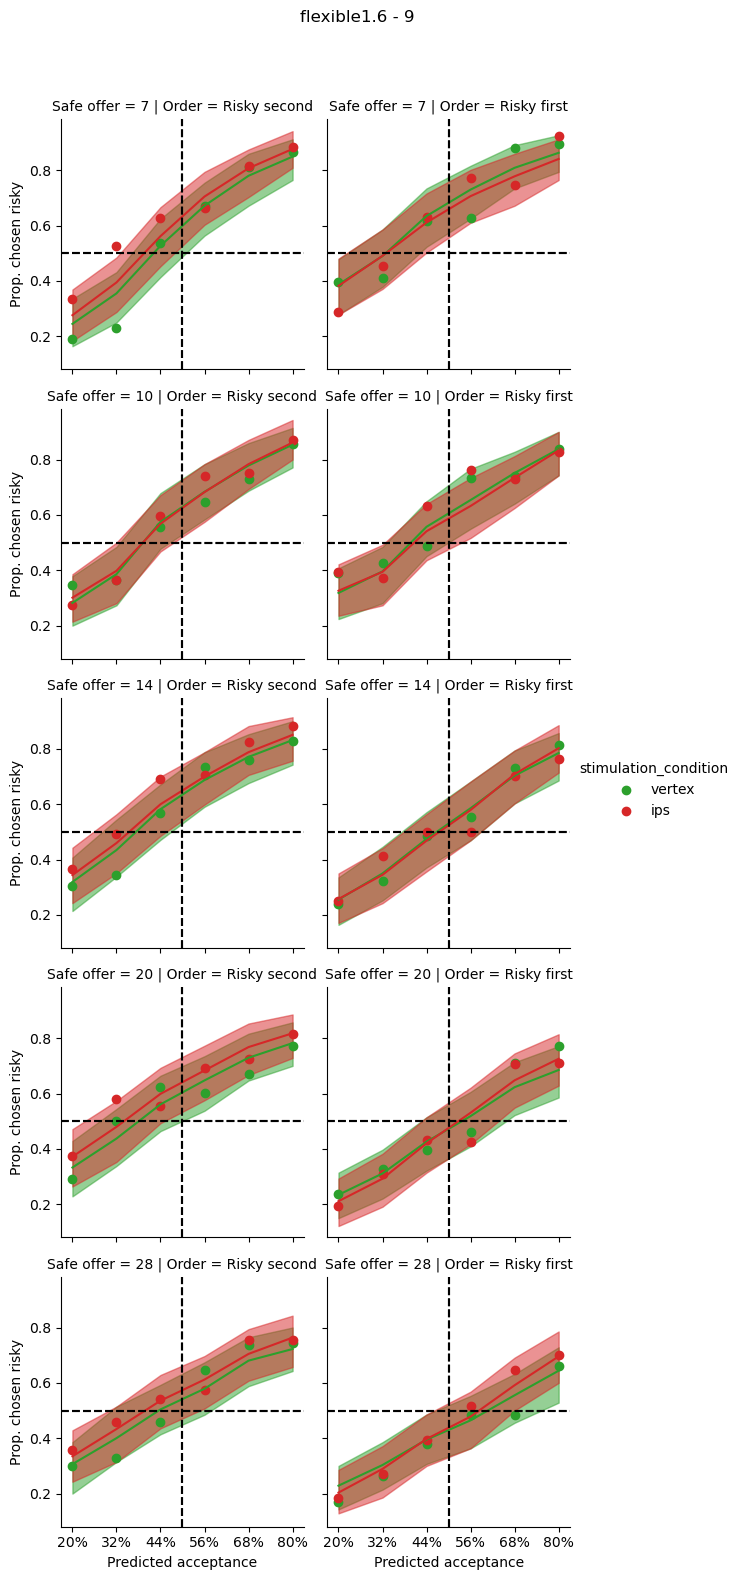

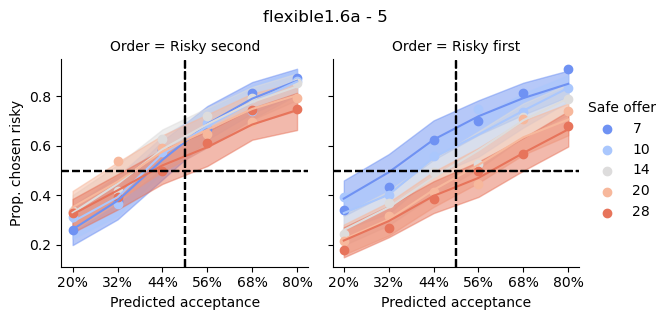

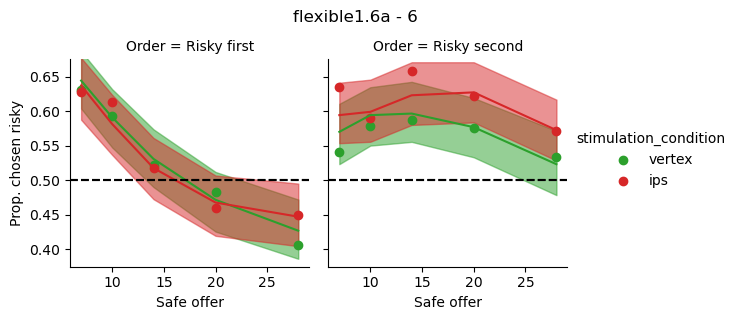

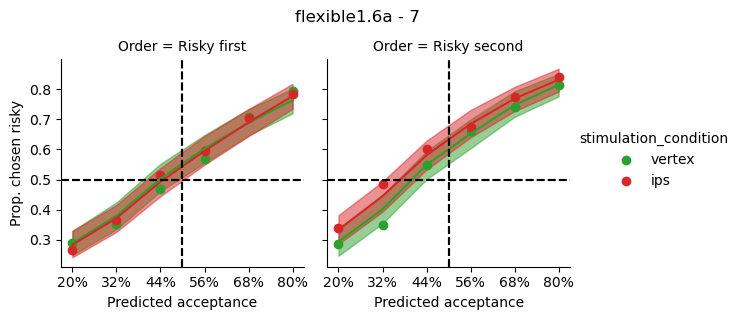

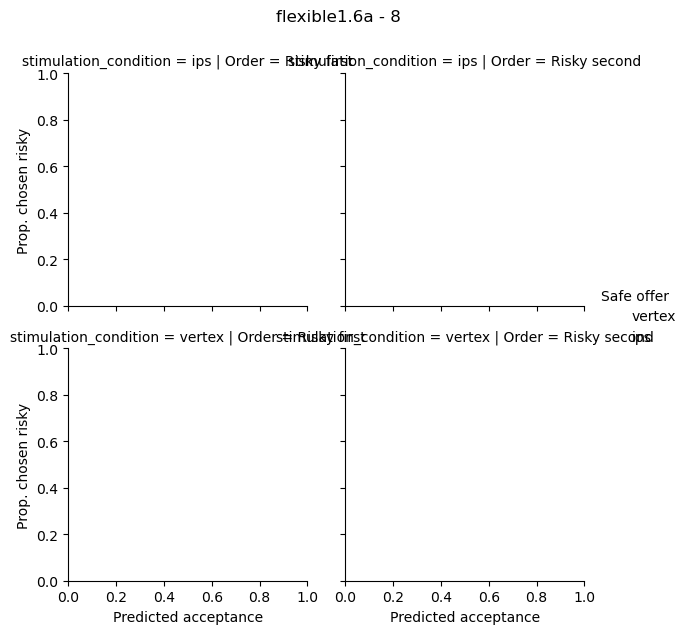

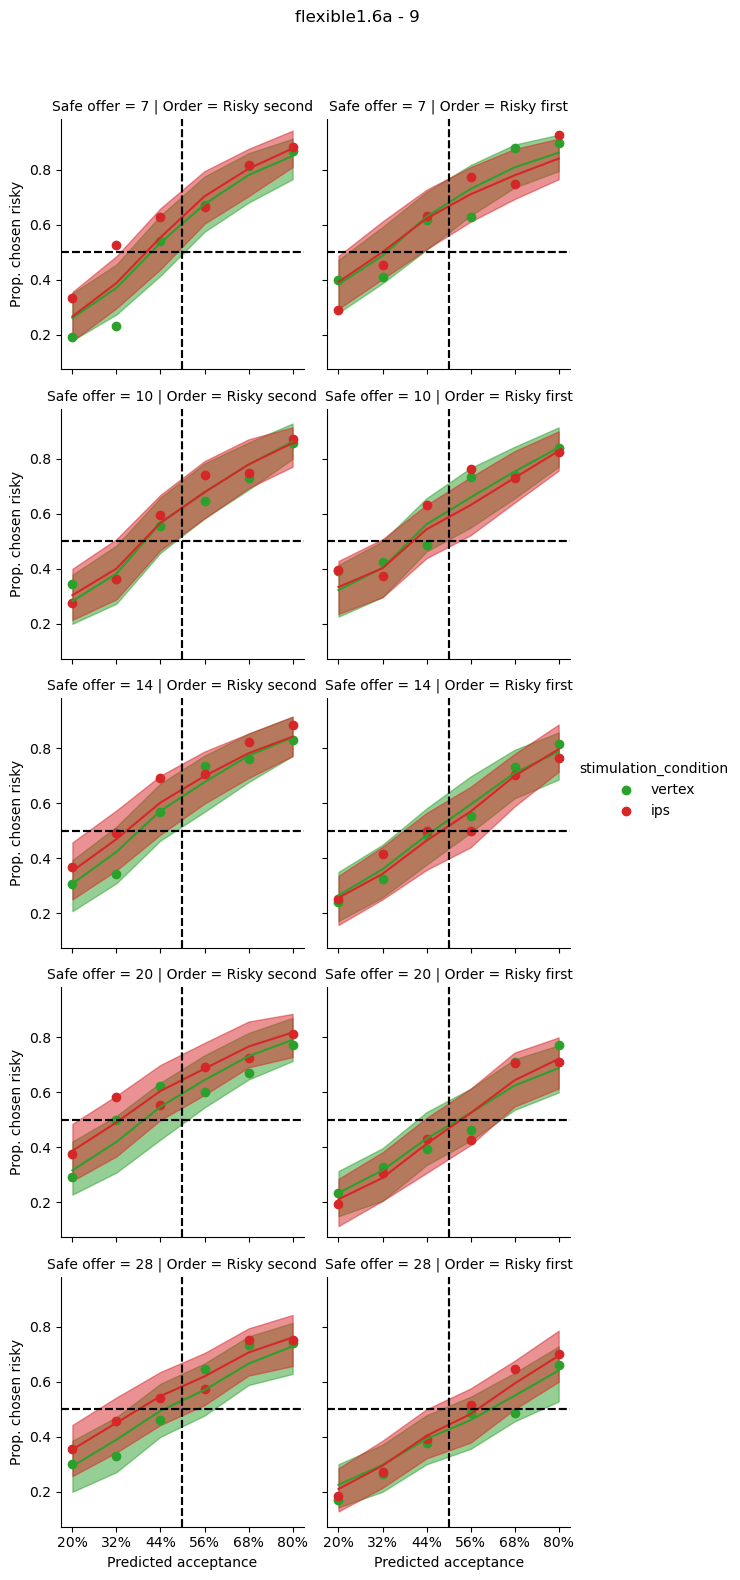

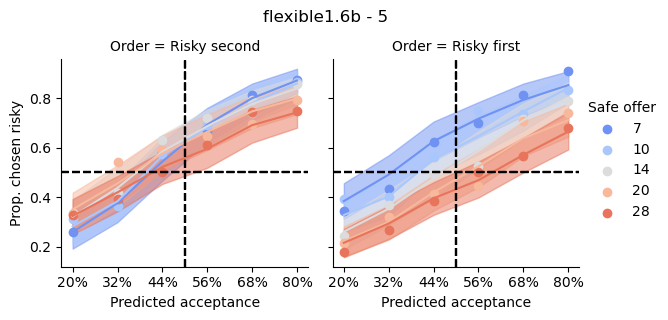

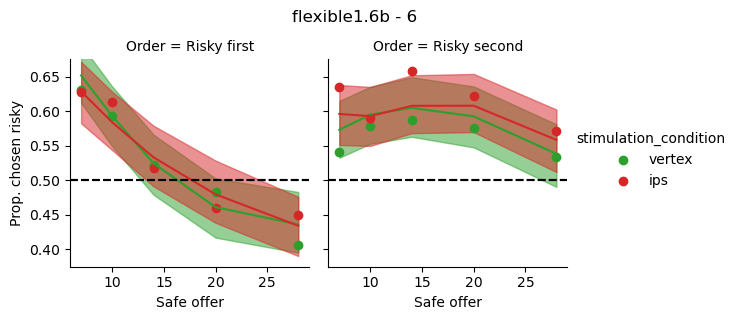

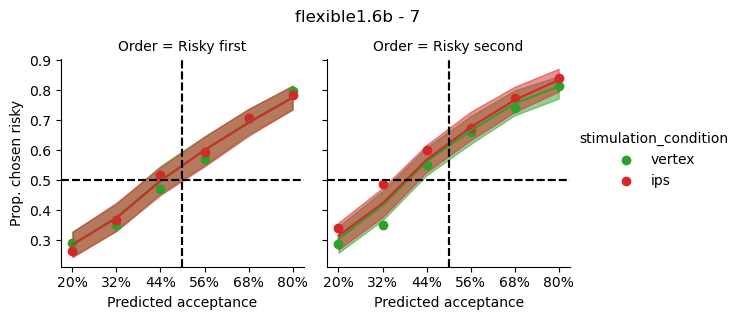

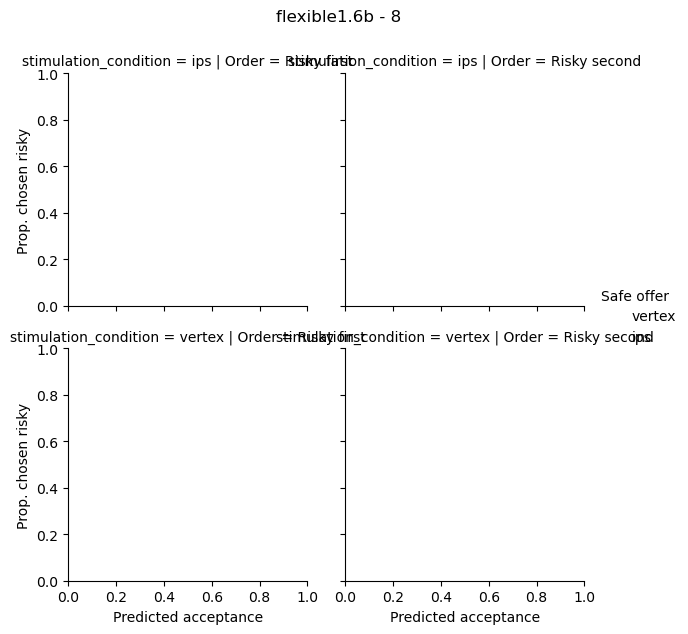

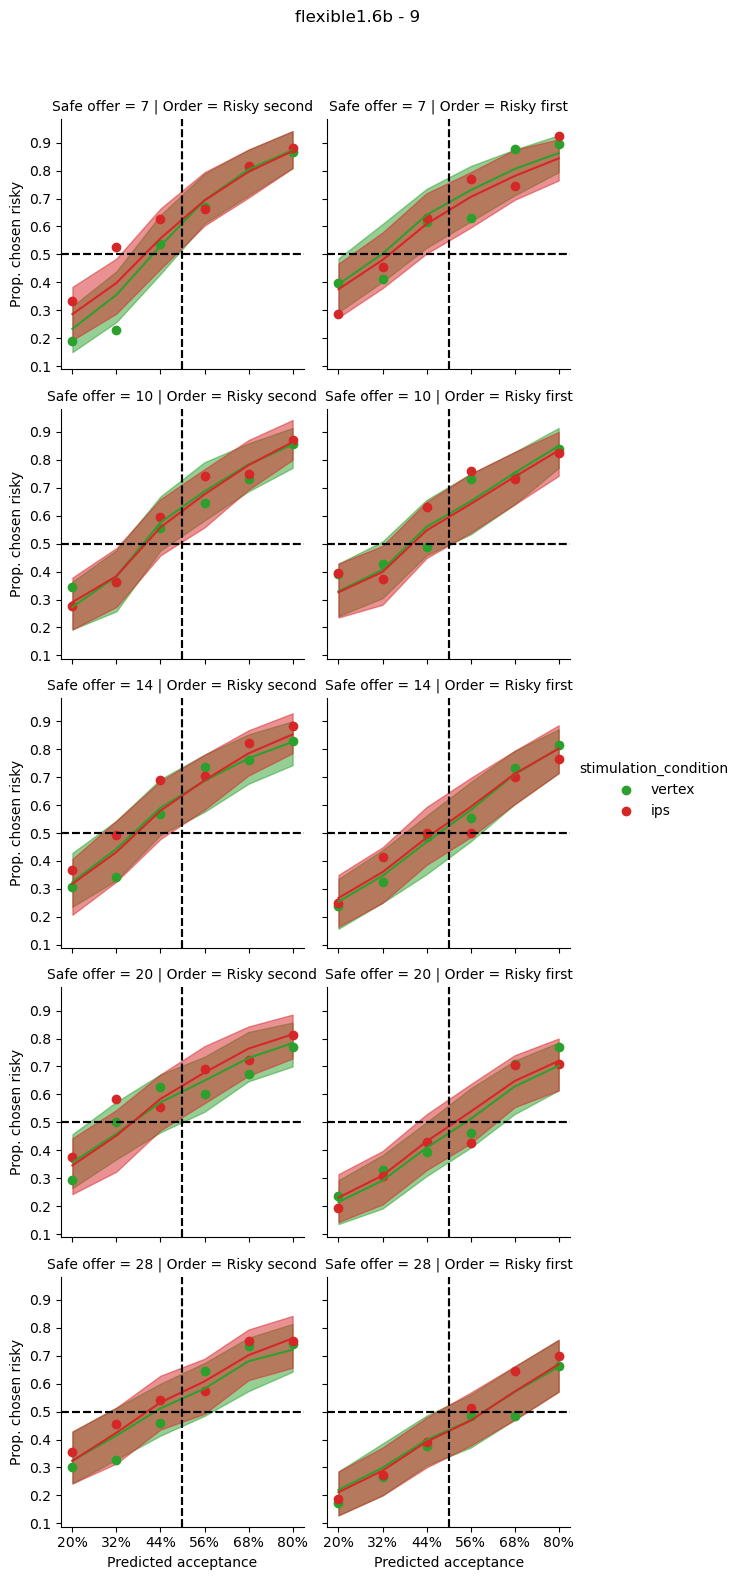

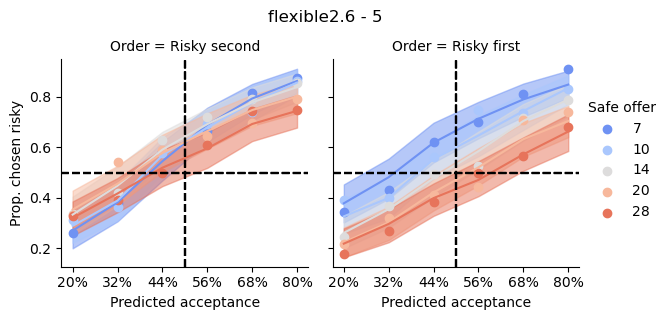

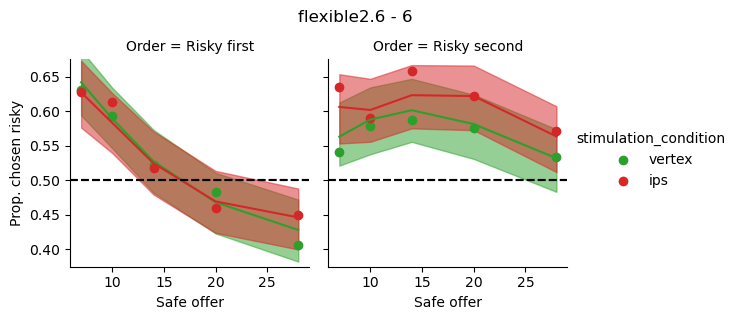

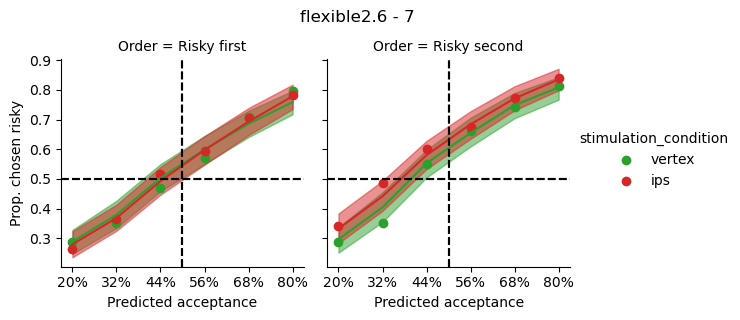

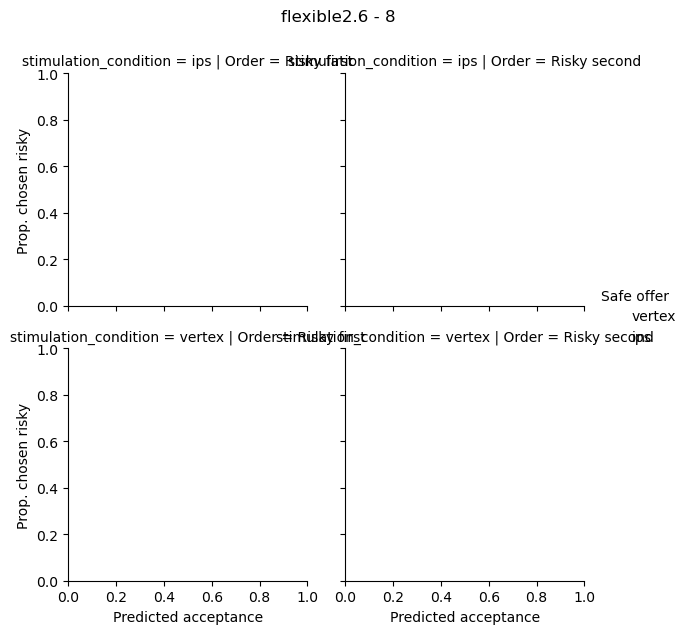

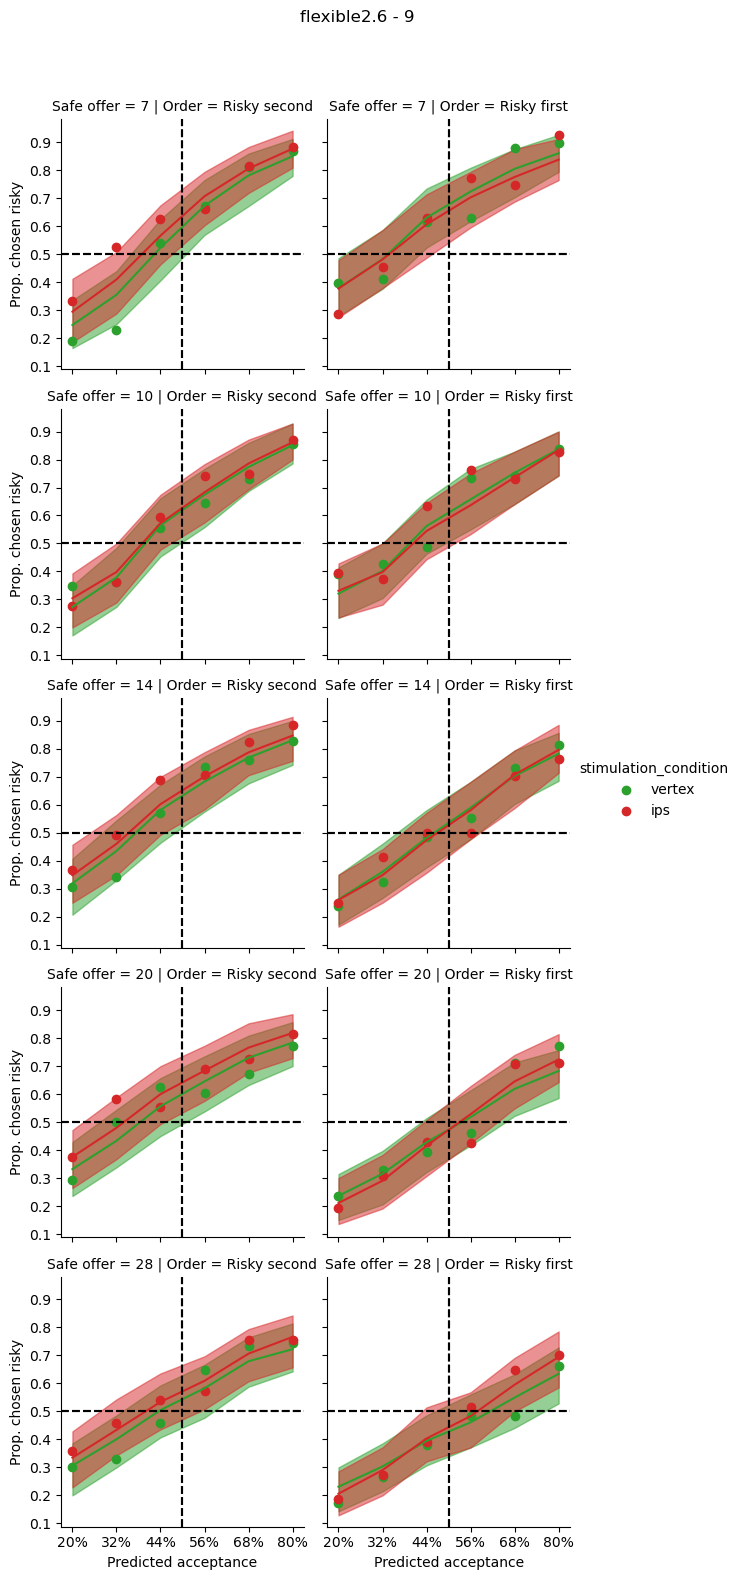

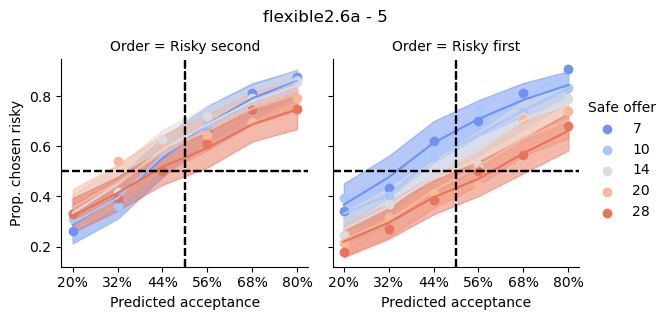

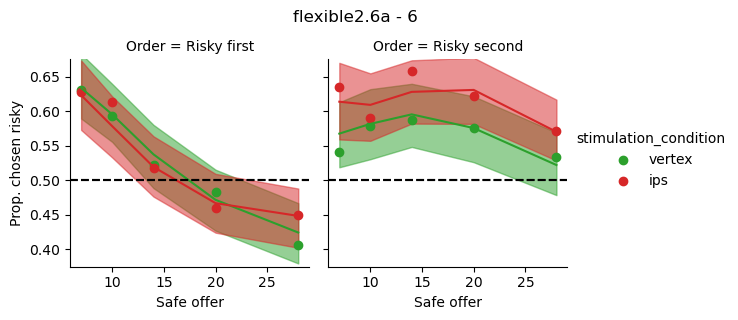

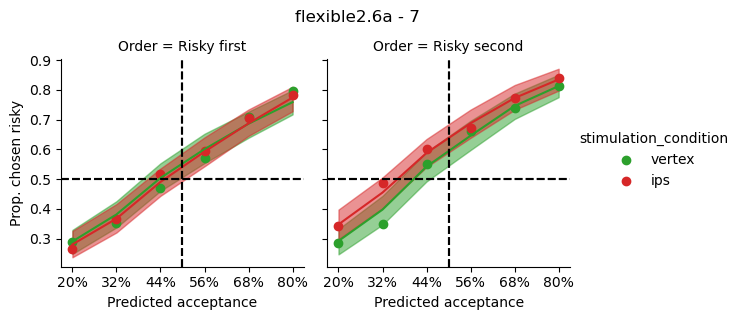

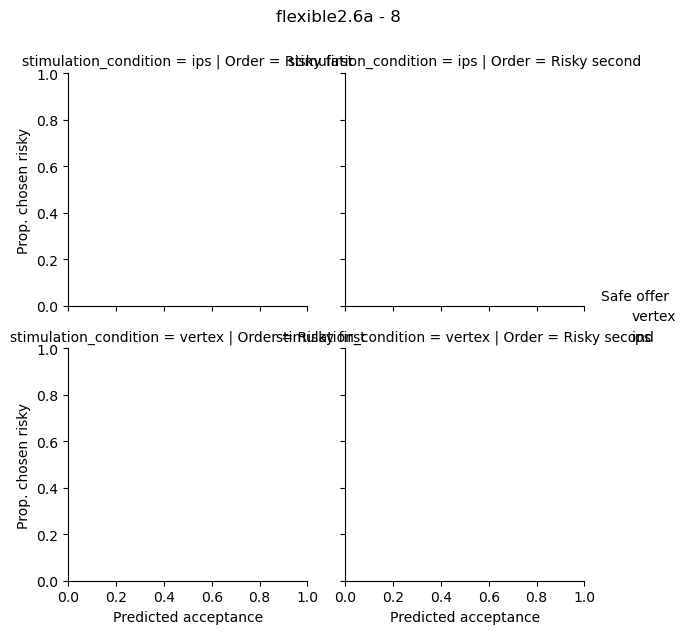

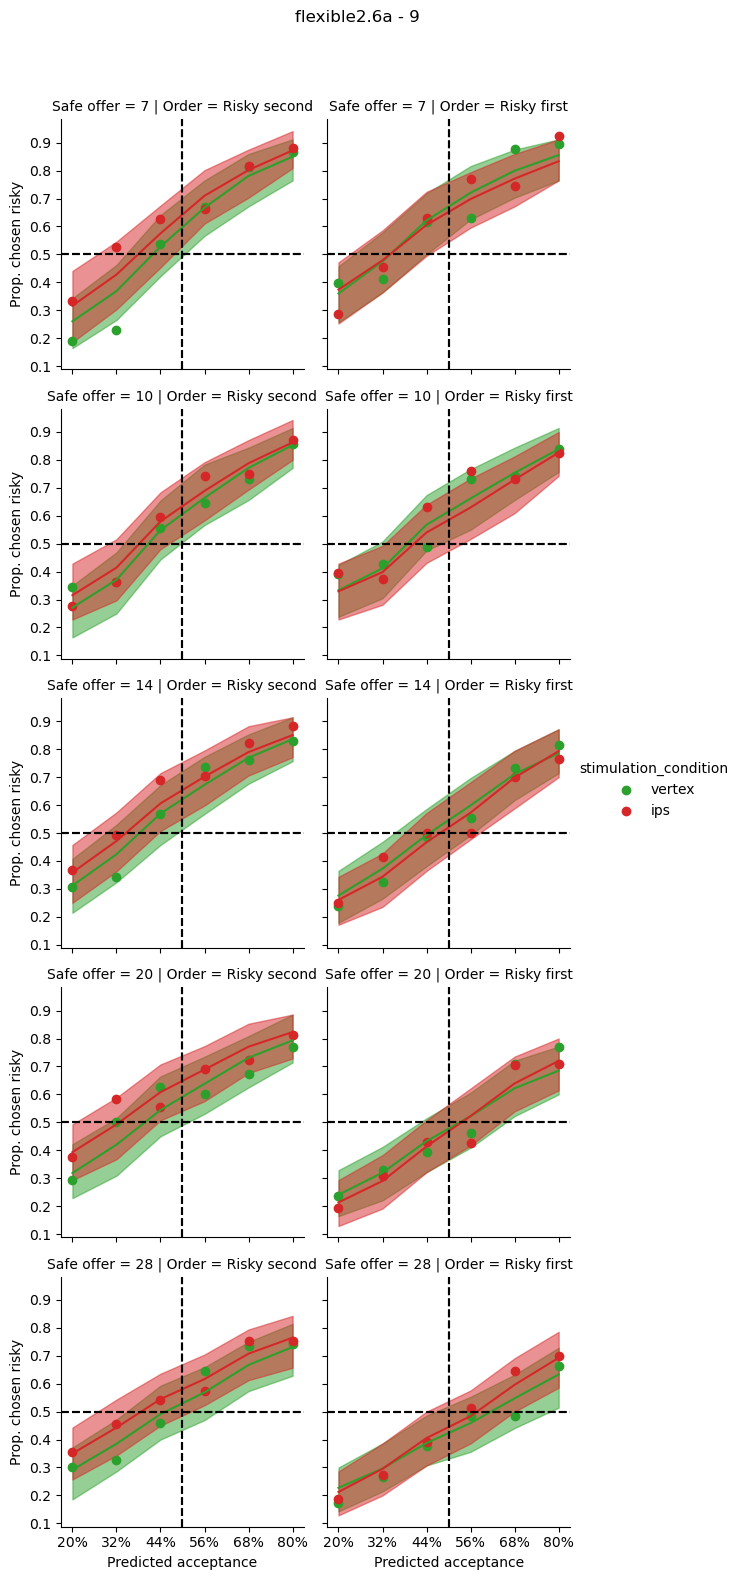

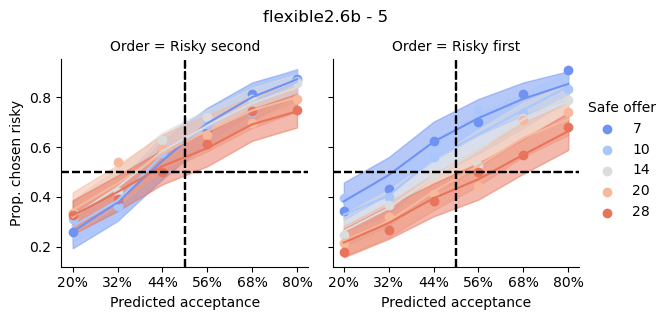

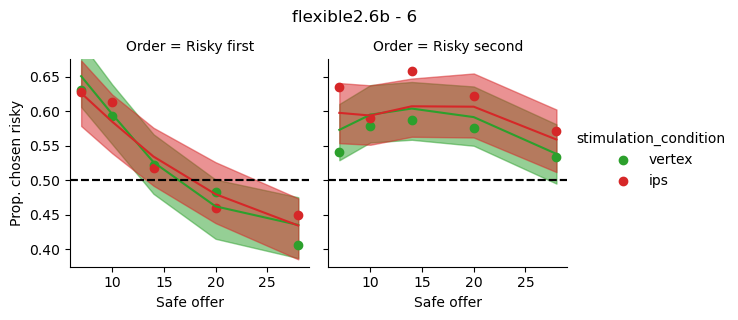

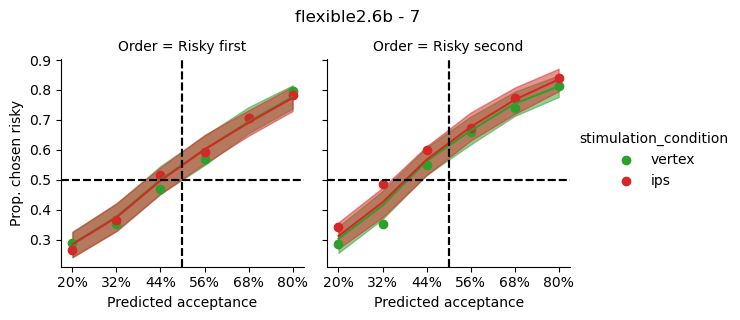

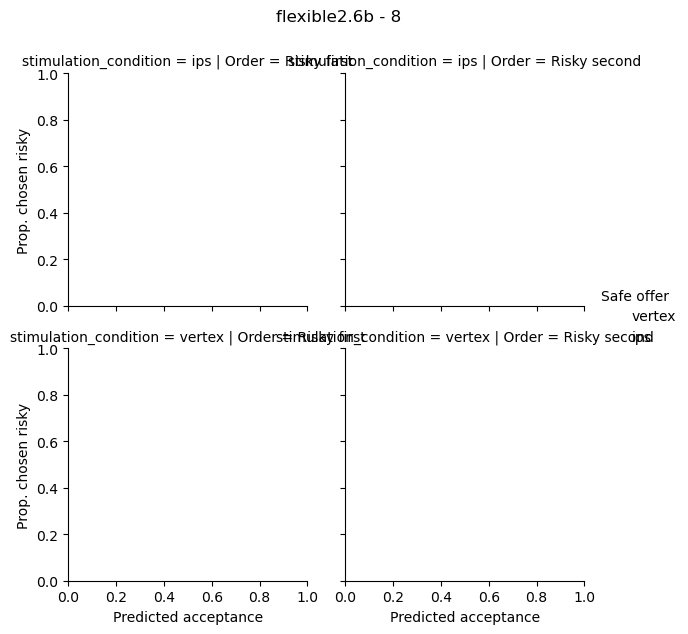

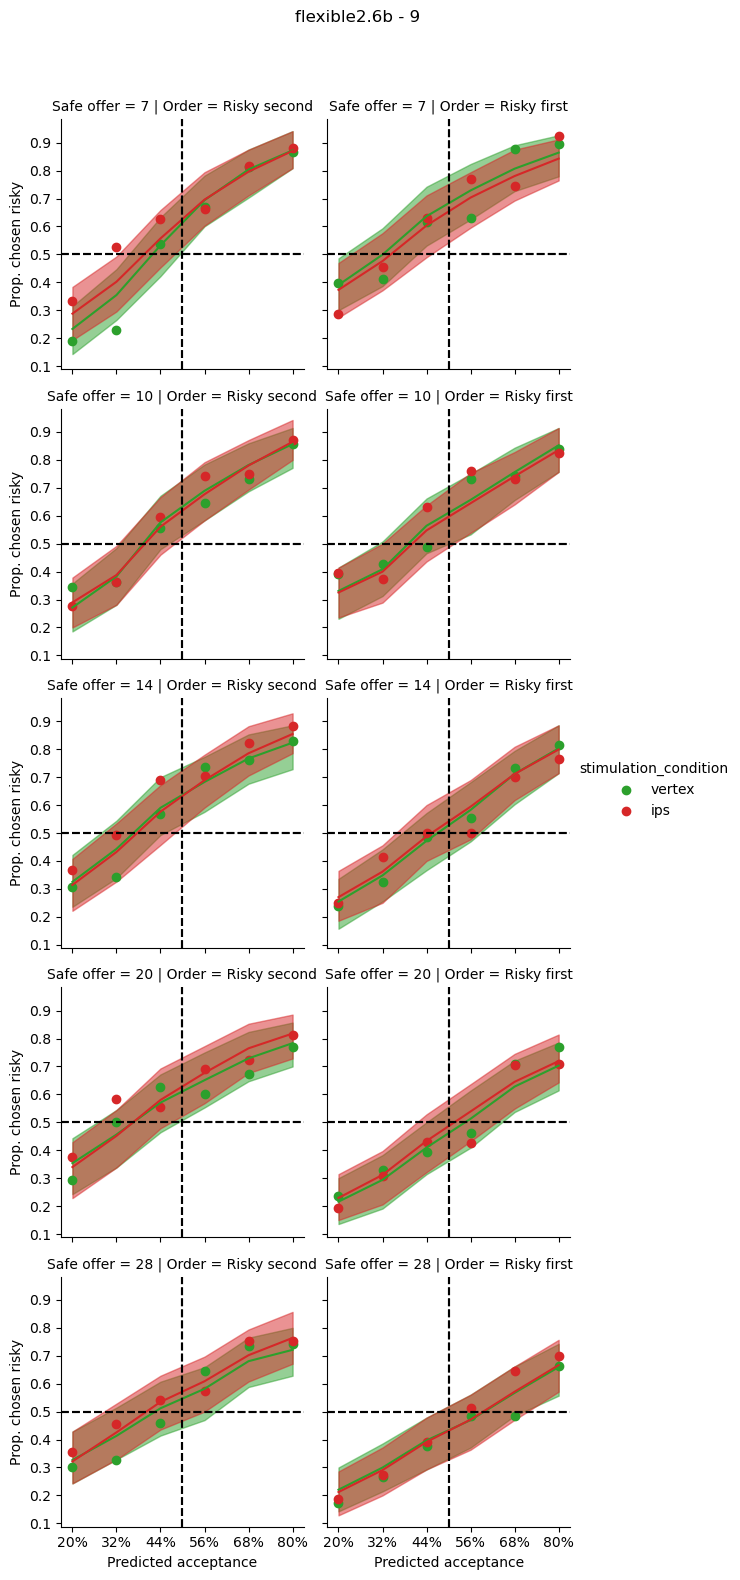

In [3]:
conditions = pd.DataFrame([{'stimulation_condition':'vertex'},
                            {'stimulation_condition':'ips'}])

curve_stats = []
model_labels  = ['flexible1.6', 'flexible1.6a', 'flexible1.6b', 'flexible2.6', 'flexible2.6a', 'flexible2.6b']

curves = []
for model_label in tqdm(model_labels):
    df, model, idata = get_info(model_label)

    model.build_estimation_model()
    ppc =model.ppc(df, idata.sel(draw=slice(None, None, 10)))

    ix_risky_first = ppc.index.get_level_values('risky_first')
    ppc.loc[ix_risky_first] = 1- ppc.loc[ix_risky_first]

    for plot in [5,6,7, 8, 9]:
        g = plot_ppc(df, ppc, plot_type=plot, level='group') 
        g.fig.suptitle(f'{model_label} - {plot}', y=1.05)

        g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'cogmodels', f'{model_label}_plot{plot}.pdf'))
